# Exploratory Data Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
# Display the number of rows and columns in the dataset 
print(f"Number of rows and columns: {loan_df.shape}")

# Display summary statistics for numercial variables 
print(loan_df.describe())

Number of rows and columns: (9578, 14)
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.3756

In [3]:
# Displaying missing values in each columns 
print(loan_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


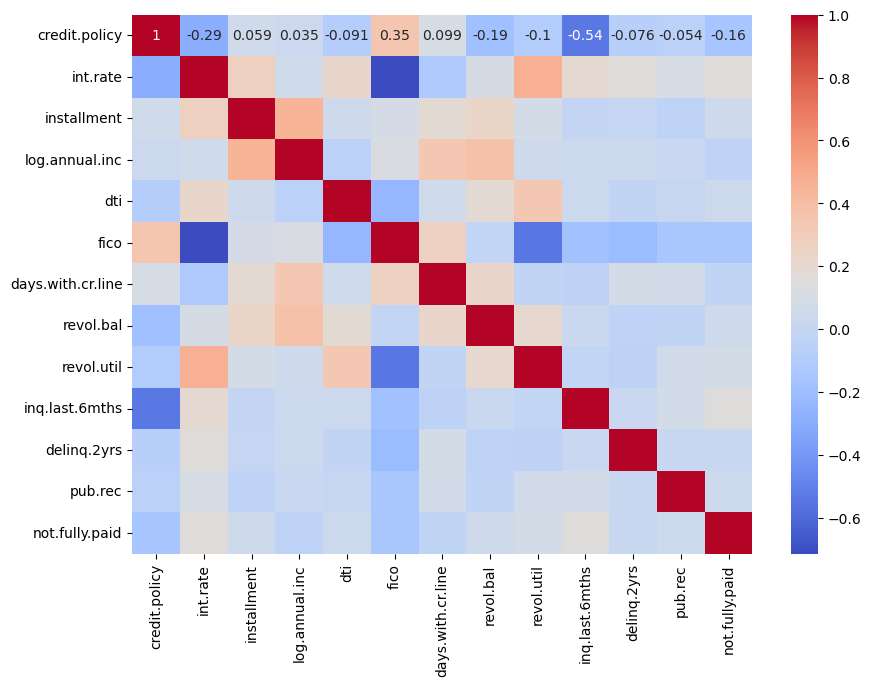

In [12]:
# Visualizing the correlation between variables 
plt.figure(figsize=(10,7))
corr = loan_df.drop('purpose', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show();

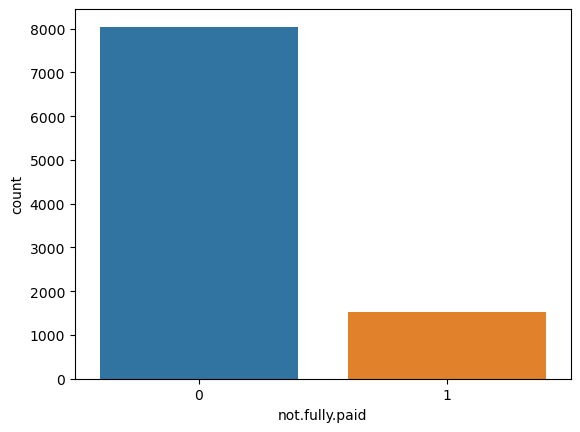

In [4]:
# Visualizing the distribution of target variable "not.fully.paid"
sns.countplot(x="not.fully.paid", data=loan_df)
plt.show();

In [7]:
# Checking the dtypes of all the columns in our dataset 
print(loan_df.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


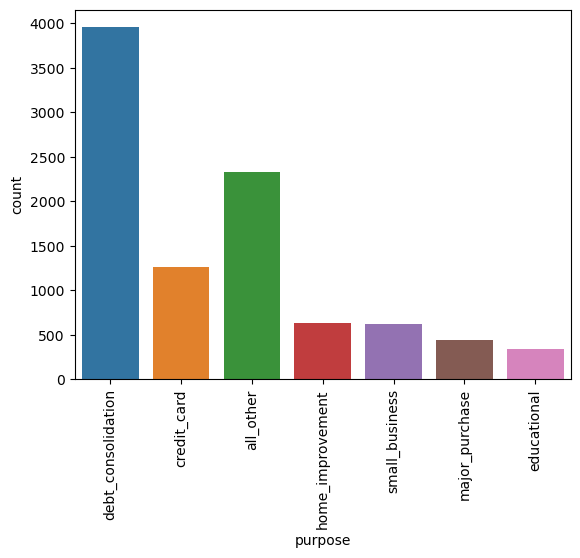

In [10]:
# Understanding loan purpose distribution 
sns.countplot(x="purpose", data=loan_df)
plt.xticks(rotation=90)
plt.show();

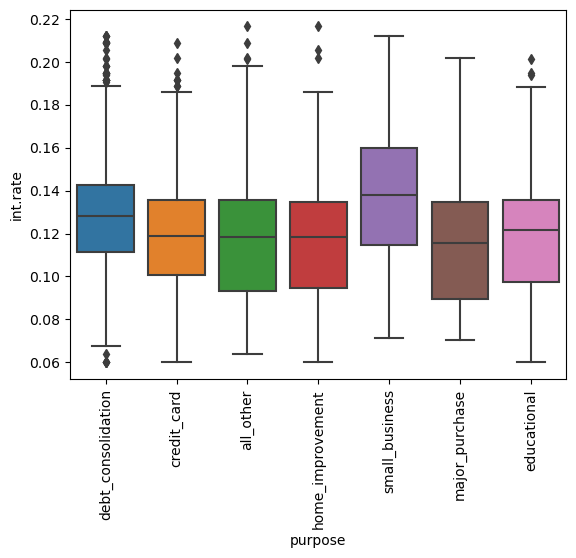

In [13]:
# Understanding the distribution of interest rates by loan purpose 
sns.boxplot(x="purpose", y='int.rate', data=loan_df)
plt.xticks(rotation=90)
plt.show(); 

# Feature Engineering

In [15]:
# Perform feature engineering
loan_df["installment_to_income_ratio"] = (
    loan_df["installment"] / loan_df["log.annual.inc"]
)
loan_df["credit_history"] = (loan_df["delinq.2yrs"] + loan_df["pub.rec"]) / loan_df[
    "fico"
]

# Preprocessing and Balancing the Data 

In [17]:
# Dropping unnecessary columns and converting the categorical variables to numerical ones 